<a href="https://colab.research.google.com/github/PoisonPanda333/Actividad-4/blob/main/Actividad_4_(Regresi%C3%B3n_lineal_y_log%C3%ADstica).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install funpymodeling

In [2]:
#importamos papalerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl
import seaborn as sns
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
files.upload()

In [ ]:
#leemos el archivo
data1 = pd.read_excel("microretailer_mit_lift_lab_actualizado.xlsx")
data1

In [ ]:
#vemos su informacion
data1.info(10000)

In [6]:
#Verificamos los valores nulos
valores_nulos=data1.isnull().sum()
valores_nulos.head(9999999999999)

_record_id                                0
_title                                    0
_server_updated_at                        0
_updated_by                               0
_geometry                                 0
                                       ... 
234_willingness_participate_workshop    125
318_shopkeeper_name                     249
319_shopkeepers_last_name               252
236_whatsapp                            255
235_email                               283
Length: 106, dtype: int64

In [7]:
#reemplazamos los valores nulos con la palabra nulo
data=data1.copy()

In [8]:
#verificamos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

_record_id                                0
_title                                    0
_server_updated_at                        0
_updated_by                               0
_geometry                                 0
                                       ... 
234_willingness_participate_workshop    125
318_shopkeeper_name                     249
319_shopkeepers_last_name               252
236_whatsapp                            255
235_email                               283
Length: 106, dtype: int64

In [9]:
#aplicamos filtro
filtro1=data.iloc[ : , [0,1,2,3,4,7,8,9,10,11,12,15,17,18,19,20,25,26,27,28,30,32,34,35,36,37,38,39,40,41,43,44,46,47,48,50,52,53,54,55,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,79,80,81,82,83,84,85,86,87,88,89,91,92,93,94,95,96,97,98,99,100,101,102,103,105]] #obj
filtro2=data.iloc[ : , [5,6,13,16,14,21,22,29,31,33,42,45,49,51,56,57,58,59,60,78,90,104]]     #float

In [10]:
#Limpiamos los valores nulos de las columnas tipo objeto y la sustituimos con la palabra nulo
filtro1=filtro1.fillna("nulo")

In [11]:
#verificamos la información
filtro1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 82 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   _record_id                                                  330 non-null    object
 1   _title                                                      330 non-null    object
 2   _server_updated_at                                          330 non-null    object
 3   _updated_by                                                 330 non-null    object
 4   _geometry                                                   330 non-null    object
 5   228_store_name                                              330 non-null    object
 6   229_store_picture                                           330 non-null    object
 7   232_type_of_store                                           330 non-null    object
 8   108_does_t

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<Figure size 1080x576 with 0 Axes>

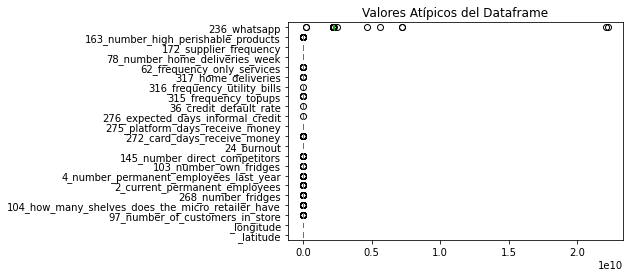

In [12]:
#hacemos una grafica de valores atipicos
fig = plt.figure(figsize =(15, 8))
filtro2.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

In [13]:
#hacemos uso del metodo de cuartiles 
y=filtro2

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido _latitude                                            1.911449e+01
_longitude                                          -9.810373e+01
97_number_of_customers_in_store                      5.000000e+00
104_how_many_shelves_does_the_micro_retailer_have    1.350000e+01
268_number_fridges                                   5.000000e+00
2_current_permanent_employees                        3.500000e+00
4_number_permanent_employees_last_year               5.000000e+00
103_number_own_fridges                               5.375000e+00
145_number_direct_competitors                        1.062500e+01
24_burnout                                           1.200000e+01
272_card_days_receive_money                          1.000000e+00
275_platform_days_receive_money                      1.125000e+01
276_expected_days_informal_credit                    3.450000e+01
36_credit_default_rate                               5.000000e+00
315_frequency_topups                              

In [14]:
#mostramos los limites 
outliers_iqr= filtro2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
outliers_iqr

,_latitude,_longitude,97_number_of_customers_in_store,104_how_many_shelves_does_the_micro_retailer_have,268_number_fridges,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,...,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
0,19.043965,-98.201379,1.0,3.0,3.0,2.0,NaN,3.0,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,2.0,10.0,NaN
1,19.043975,-98.201696,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19.043300,-98.196447,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19.040570,-98.197072,1.0,0.0,0.0,0.0,0.0,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN
4,19.043674,-98.201134,3.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,19.043188,-98.194174,0.0,7.0,1.0,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,5.0,0.0,NaN
326,19.043115,-98.194066,1.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327,19.042809,-98.193439,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328,19.042558,-98.193818,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#Reemplazamos valores atipicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe 
Valores_finales= outliers_iqr.copy()
Valores_finales=Valores_finales.fillna(round(outliers_iqr.mean(),1))
Valores_finales

,_latitude,_longitude,97_number_of_customers_in_store,104_how_many_shelves_does_the_micro_retailer_have,268_number_fridges,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,...,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
0,19.043965,-98.201379,1.0,3.0,3.0,2.0,1.5,3.0,5.0,2.0,...,10.8,1.3,4.4,2.8,6.0,10.0,2.0,2.0,10.0,2.223515e+09
1,19.043975,-98.201696,2.0,0.0,0.0,1.3,1.5,1.6,3.4,3.9,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,2.7,4.3,2.223515e+09
2,19.043300,-98.196447,2.0,0.0,0.0,1.3,1.5,1.6,3.4,3.9,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,2.7,4.3,2.223515e+09
3,19.040570,-98.197072,1.0,0.0,0.0,0.0,0.0,1.6,10.0,3.9,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,1.0,0.0,2.223515e+09
4,19.043674,-98.201134,3.0,3.0,2.0,1.3,1.5,1.6,3.4,3.9,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,2.7,4.3,2.223515e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,19.043188,-98.194174,0.0,7.0,1.0,1.3,1.5,1.6,5.0,3.9,...,10.8,1.3,4.4,2.8,6.0,1.0,1.0,5.0,0.0,2.223515e+09
326,19.043115,-98.194066,1.0,5.0,0.0,1.3,1.5,1.6,3.4,3.9,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,2.7,4.3,2.223515e+09
327,19.042809,-98.193439,3.0,1.0,1.0,1.3,1.5,1.6,3.4,3.9,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,2.7,4.3,2.223515e+09
328,19.042558,-98.193818,0.0,1.0,1.0,1.3,1.5,1.6,3.4,3.9,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,2.7,4.3,2.223515e+09


In [16]:
#vemos los valores nulos
valores_nulos=Valores_finales.isnull().sum()
valores_nulos

_latitude                                            0
_longitude                                           0
97_number_of_customers_in_store                      0
104_how_many_shelves_does_the_micro_retailer_have    0
268_number_fridges                                   0
2_current_permanent_employees                        0
4_number_permanent_employees_last_year               0
103_number_own_fridges                               0
145_number_direct_competitors                        0
24_burnout                                           0
272_card_days_receive_money                          0
275_platform_days_receive_money                      0
276_expected_days_informal_credit                    0
36_credit_default_rate                               0
315_frequency_topups                                 0
316_frequency_utility_bills                          0
317_home_deliveries                                  0
62_frequency_only_services                           0
78_number_

Regresión lineal multiple






In [17]:
#Visualizamos los primeros 5 datos 
Valores_finales.head(10)

,_latitude,_longitude,97_number_of_customers_in_store,104_how_many_shelves_does_the_micro_retailer_have,268_number_fridges,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,...,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
0,19.043965,-98.201379,1.0,3.0,3.0,2.0,1.5,3.0,5.0,2.0,...,10.8,1.3,4.4,2.8,6.0,10.0,2.0,2.0,10.0,2.223515e+09
1,19.043975,-98.201696,2.0,0.0,0.0,1.3,1.5,1.6,3.4,3.9,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,2.7,4.3,2.223515e+09
2,19.043300,-98.196447,2.0,0.0,0.0,1.3,1.5,1.6,3.4,3.9,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,2.7,4.3,2.223515e+09
3,19.040570,-98.197072,1.0,0.0,0.0,0.0,0.0,1.6,10.0,3.9,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,1.0,0.0,2.223515e+09
4,19.043674,-98.201134,3.0,3.0,2.0,1.3,1.5,1.6,3.4,3.9,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,2.7,4.3,2.223515e+09
5,19.044002,-98.200912,2.0,6.0,1.0,1.3,1.5,1.6,3.4,3.9,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,2.7,4.3,2.223515e+09
6,19.043920,-98.201472,0.0,2.0,2.0,1.3,1.5,1.6,3.4,3.9,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,2.7,4.3,2.223515e+09
7,19.043972,-98.201393,3.0,2.0,2.0,1.3,1.5,1.6,3.4,3.9,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,2.7,4.3,2.223515e+09
8,19.043967,-98.201791,1.1,3.0,4.0,1.3,1.5,4.0,3.0,3.0,...,10.8,1.3,4.4,2.8,4.0,0.0,2.0,3.0,4.3,2.223515e+09
9,19.016819,-98.220304,1.0,6.0,0.0,0.0,1.0,1.6,1.0,3.9,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,1.0,0.0,2.226697e+09


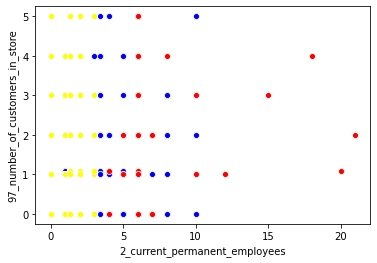

In [18]:
#Se grafican mapas de dispersión de las variables 3 variables:'alcohol', 'speeding' y 'no_previous' al respecto a la variable "total"
from turtle import color

sns.scatterplot(x='145_number_direct_competitors', y='97_number_of_customers_in_store', color="blue", data=Valores_finales)
sns.scatterplot(x='317_home_deliveries', y='97_number_of_customers_in_store', color="red", data=Valores_finales)
sns.scatterplot(x='2_current_permanent_employees', y='97_number_of_customers_in_store', color="yellow", data=Valores_finales)

In [19]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= Valores_finales[['145_number_direct_competitors', '317_home_deliveries','2_current_permanent_employees']]
Var_Dep= data1['97_number_of_customers_in_store']

In [20]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [21]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [22]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [23]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['145_number_direct_competitors', '317_home_deliveries',
        '2_current_permanent_employees'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.06178965, 0.16859679, 0.269003  ]),
 '_residues': 1047.3392916982052,
 'rank_': 3,
 'singular_': array([37.18596081, 32.16870794, 12.95785721]),
 'intercept_': -0.18935753888435625}

In [24]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R2 Determinación
model.score(Vars_Indep,Var_Dep)

0.04470484399935959

**MODELO PREDICTIVO**



In [25]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=Valores_finales[['145_number_direct_competitors', '317_home_deliveries', '2_current_permanent_employees']])
y_pred

array([ 1.66917745e+00,  1.38201190e+00,  1.38201190e+00,  1.44011971e+00,
        1.38201190e+00,  1.38201190e+00,  1.38201190e+00,  1.38201190e+00,
        1.02010247e+00,  8.84012826e-01,  1.36022918e+00,  1.76958367e+00,
        1.60738780e+00,  1.48380849e+00,  1.19296109e+00,  1.15301583e+00,
        1.33838479e+00,  1.21480548e+00,  1.19296109e+00,  1.81460115e+00,
        1.09122618e+00,  1.66917745e+00,  1.42201883e+00,  1.60738780e+00,
        1.00759213e+00,  1.85454641e+00,  2.65251286e+00,  1.21480548e+00,
        2.28817585e+00,  1.09122618e+00,  1.93818045e+00,  1.35729604e+00,
        1.38201190e+00,  1.38201190e+00,  1.00759213e+00,  1.38201190e+00,
        1.38201190e+00,  1.66917745e+00,  1.38201190e+00,  1.03230799e+00,
        1.15301583e+00,  3.14660325e+00,  1.25048891e+00,  1.38201190e+00,
        1.38201190e+00,  1.38201190e+00,  1.00759213e+00,  8.84012826e-01,
        1.38201190e+00,  1.66917745e+00,  1.38201190e+00,  1.38201190e+00,
        1.38201190e+00,  

In [28]:
#Insertamos la columna de predicciones en el DataFrame
Valores_finales.insert(0, 'Predicciones', y_pred)
Valores_finales

,Predicciones,_latitude,_longitude,97_number_of_customers_in_store,104_how_many_shelves_does_the_micro_retailer_have,268_number_fridges,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,...,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
0,1.669177,19.043965,-98.201379,1.0,3.0,3.0,2.0,1.5,3.0,5.0,...,10.8,1.3,4.4,2.8,6.0,10.0,2.0,2.0,10.0,2.223515e+09
1,1.382012,19.043975,-98.201696,2.0,0.0,0.0,1.3,1.5,1.6,3.4,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,2.7,4.3,2.223515e+09
2,1.382012,19.043300,-98.196447,2.0,0.0,0.0,1.3,1.5,1.6,3.4,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,2.7,4.3,2.223515e+09
3,1.440120,19.040570,-98.197072,1.0,0.0,0.0,0.0,0.0,1.6,10.0,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,1.0,0.0,2.223515e+09
4,1.382012,19.043674,-98.201134,3.0,3.0,2.0,1.3,1.5,1.6,3.4,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,2.7,4.3,2.223515e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,1.480875,19.043188,-98.194174,0.0,7.0,1.0,1.3,1.5,1.6,5.0,...,10.8,1.3,4.4,2.8,6.0,1.0,1.0,5.0,0.0,2.223515e+09
326,1.382012,19.043115,-98.194066,1.0,5.0,0.0,1.3,1.5,1.6,3.4,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,2.7,4.3,2.223515e+09
327,1.382012,19.042809,-98.193439,3.0,1.0,1.0,1.3,1.5,1.6,3.4,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,2.7,4.3,2.223515e+09
328,1.382012,19.042558,-98.193818,0.0,1.0,1.0,1.3,1.5,1.6,3.4,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,2.7,4.3,2.223515e+09


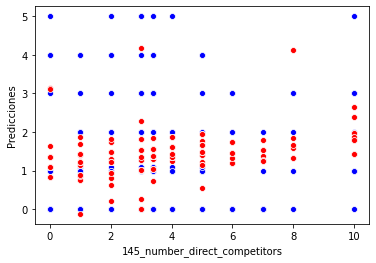

In [29]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='145_number_direct_competitors', y='97_number_of_customers_in_store', color="blue", data=Valores_finales)
sns.scatterplot(x='145_number_direct_competitors', y='Predicciones', color="red", data=Valores_finales)


In [30]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.04470484399935959

In [31]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.21143520047371392

Regresión Lineal

In [ ]:
#Mostramos los primeros 20 valores 
Valores_finales.head(20)

In [33]:
#Rellenamos nulos
df =Valores_finales.fillna(method="ffill")
df =Valores_finales.fillna(method="bfill")

In [34]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df[['145_number_direct_competitors', '317_home_deliveries', '2_current_permanent_employees']]
Var_Dep= df['97_number_of_customers_in_store']

In [35]:
#Redefinimos las variables 
X= Vars_Indep
y= Var_Dep

In [36]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [37]:
#Se escalan todos los datos
escalar = StandardScaler()

In [38]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [39]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [40]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

ValueError: ignored

In [ ]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test) 
y_pred

In [ ]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

In [ ]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label="yes")
print('Precisión del modelo:')
print(precision)

In [ ]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

In [ ]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad)

In [ ]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label="yes")
print('Puntaje F1 del modelo:')
print(puntajef1)

In [41]:
#concatemos 
Lastmile_customer_limpios = pd.concat([filtro1, Valores_finales], axis=1)
Lastmile_customer_limpios

,_record_id,_title,_server_updated_at,_updated_by,_geometry,228_store_name,229_store_picture,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,...,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
0,71326e5f-441e-4be7-bc68-b828973b8e3b,"November 17, 2022",2022-11-18 20:48:40 UTC,Uriel Bonilla,SRID=4326;POINT(-98.2013790035 19.0439654034),Mini súper 7 hermanos,1 Photo,Grocery store (aka. nanostore),no,yes,...,10.8,1.3,4.4,2.8,6.0,10.0,2.0,2.0,10.0,2.223515e+09
1,a38b7c68-0afa-4419-a580-7086538b2e21,"November 17, 2022",2022-11-18 20:48:39 UTC,Uriel Bonilla,SRID=4326;POINT(-98.2016961782 19.0439749111),Super papas Lulu,1 Photo,Grocery store (aka. nanostore),no,yes,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,2.7,4.3,2.223515e+09
2,c11ef540-e06c-4722-a071-09a127ebc23c,"November 10, 2022",2022-11-18 20:48:38 UTC,Uriel Bonilla,SRID=4326;POINT(-98.1964474585 19.0432999683),Arte Paquistán,1 Photo,Grocery store (aka. nanostore),no,yes,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,2.7,4.3,2.223515e+09
3,c7434cb2-dde0-4901-80d7-3d60506ebd27,"November 10, 2022",2022-11-18 20:48:38 UTC,Uriel Bonilla,SRID=4326;POINT(-98.197072078 19.0405699102),El vestir,1 Photo,Grocery store (aka. nanostore),no,yes,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,1.0,0.0,2.223515e+09
4,3c2177cc-677b-4106-8ed2-6e50f7671a0e,"November 17, 2022",2022-11-18 13:30:19 UTC,Fernando Báez,SRID=4326;POINT(-98.201134218 19.0436743967),Antojitos Tony,1 Photo,Micro-restaurant (aka. fondita),no,no,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,2.7,4.3,2.223515e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,efe2e285-c67e-4a07-8331-218bc4a7203d,"November 3, 2022",2022-11-03 17:05:23 UTC,Francisco Adán,SRID=4326;POINT(-98.194174 19.0431876),Xuti Galería,1 Photo,productos tradicionales,no,yes,...,10.8,1.3,4.4,2.8,6.0,1.0,1.0,5.0,0.0,2.223515e+09
326,2413f06e-15cc-4a6f-8e83-5224c6824b12,"November 3, 2022",2022-11-03 16:50:48 UTC,Emilio Garza,SRID=4326;POINT(-98.1940658722 19.0431145635),July Store,1 Photo,Grocery store (aka. nanostore),yes,no,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,2.7,4.3,2.223515e+09
327,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,"November 3, 2022",2022-11-03 16:28:14 UTC,Emilio Garza,SRID=4326;POINT(-98.1934387078 19.0428094171),La fonda,1 Photo,Micro-restaurant (aka. fondita),yes,no,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,2.7,4.3,2.223515e+09
328,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,"November 3, 2022",2022-11-03 16:18:37 UTC,Francisco Adán,SRID=4326;POINT(-98.193818 19.042558),"Birria de Res ""Hermanos Negreros 2"" estilo Tij...",1 Photo,Micro-restaurant (aka. fondita),no,no,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,2.7,4.3,2.223515e+09


In [42]:
#Convertir DataFrame a CSV
Lastmile_customer_limpios.to_csv("microretailer_mit_lift_lab_actualizado.csv.")

In [43]:
#Descargar archivo filtrado en csv 
from google.colab import files
files.download("microretailer_mit_lift_lab_actualizado.csv.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>